In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template

In [3]:
def pltshow(imgzz):
    plt.imshow(cv2.cvtColor(imgzz, cv2.COLOR_BGR2RGB))
    
def eqhist(img):
    return cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

def getCanPipe(image, eqHist = False, blur = True, ):
    if eqHist:
        gray = eqhist(image)
    else:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if blur:
        blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
    else:
        blurred = gray
    edged = cv2.Canny(blurred, 100, 300)
    return edged

def sortCorners(corners):
    c = []
    idx = 0
    for i in corners.tolist():
        c.append(i[0])
        idx+=1
    c = sorted(c, key=lambda x:x[1])
    topones = [c[0], c[1]]
    bottomones = [c[2], c[3]]
    topones = sorted(topones, key = lambda x:x[0])
    topleft = topones[0]
    topright = topones[1]

    botones = sorted(bottomones, key = lambda x:x[0])
    bottomleft = botones[0]
    bottomright = botones[1]
    cornersz = [topleft, topright, bottomleft, bottomright]
    return cornersz

def getRect(edged):
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    receiptCnt = None
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:
            receiptCnt = approx
            # print(receiptCnt)
            break
    if receiptCnt is None:
        raise Exception(("No outline, oof"))
    return receiptCnt

def drawRect(image, rect):
    output = image.copy()
    cv2.drawContours(output, [rect], -1, (0, 255, 0), 2)
    pltshow(output)

def histeq(rgb_img):
    ycrcb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)
    ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
    return cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

def subtractMaskFromImg(img, mask1):
    mask2 = cv2.bitwise_not(mask1)
    return cv2.bitwise_and(img, img, mask = mask2)

def getMaskFromImg(img, mask):
    return cv2.bitwise_and(img, img, mask = mask)

In [ ]:
w, h, c = template.shape
method = eval('cv2.TM_CCOEFF')
result = cv2.matchTemplate(img, templ = template, method = method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img, top_left, bottom_right, color = (255, 0, 0), thickness = 3)
plt.figure(figsize=(30, 20))
plt.subplot(2, 2, 1).set_title('Image of Selena Gomez and Taylor Swift', fontsize = 35); plt.axis('off')
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 2).set_title('Face Template of Selena Gomez', fontsize = 35); plt.axis('off')
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 3).set_title('Matching Result', fontsize = 35); plt.axis('off')
plt.imshow(result, cmap = 'gray')
plt.subplot(2, 2, 4).set_title('Detected Face', fontsize = 35); plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

In [7]:
plt.rcParams["figure.figsize"] = (15,15)

# Method 3

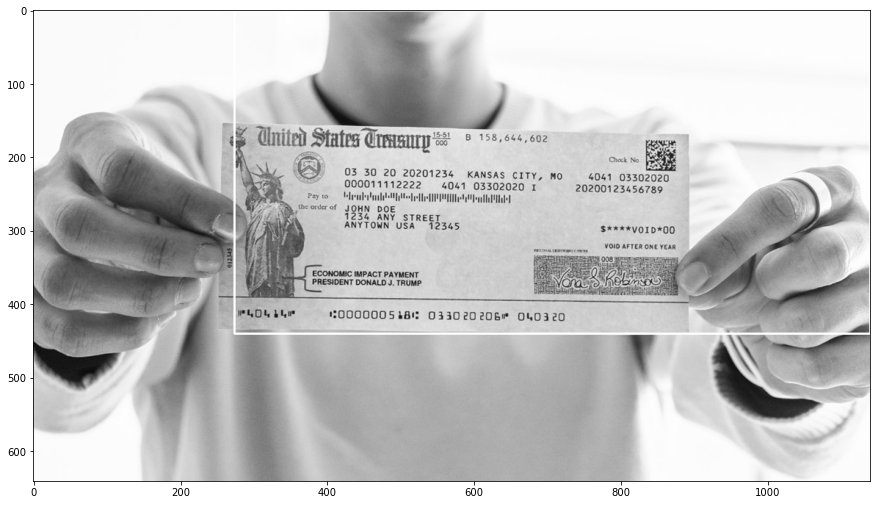

In [80]:
pltshow(img)

In [83]:
for meth in methods:
    print(eval(meth), meth)

4 cv.TM_CCOEFF
5 cv.TM_CCOEFF_NORMED
2 cv.TM_CCORR
3 cv.TM_CCORR_NORMED
0 cv.TM_SQDIFF
1 cv.TM_SQDIFF_NORMED


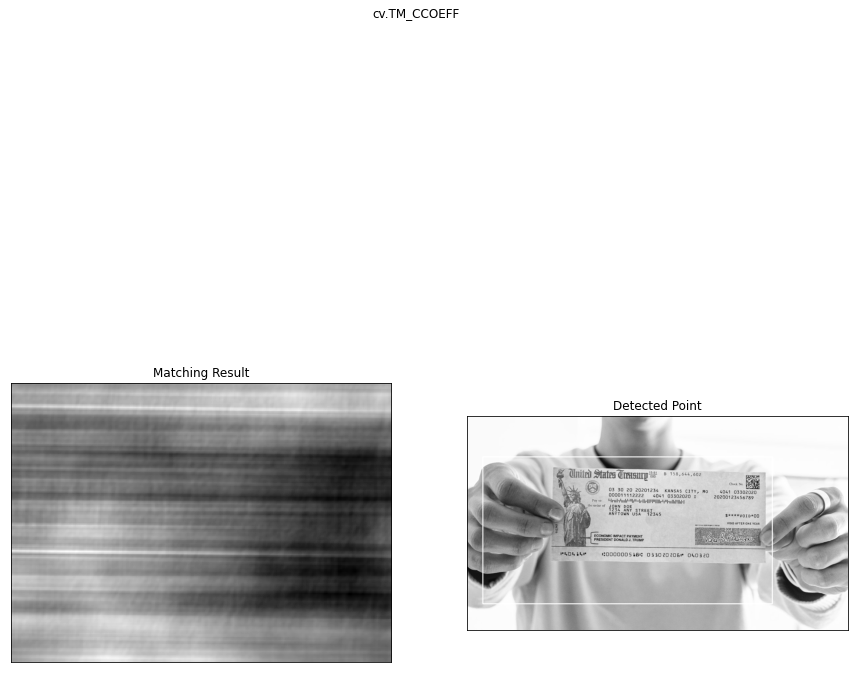

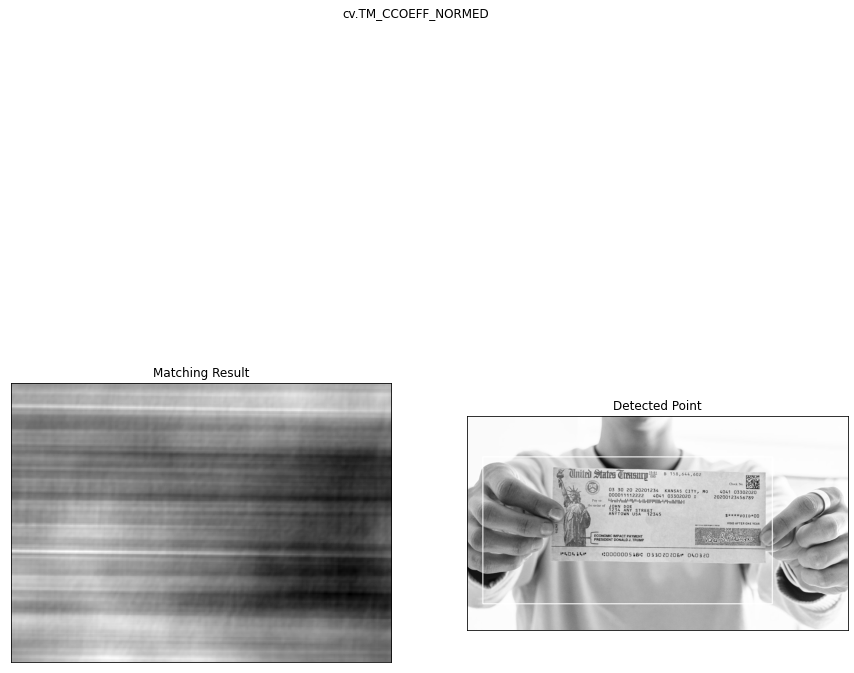

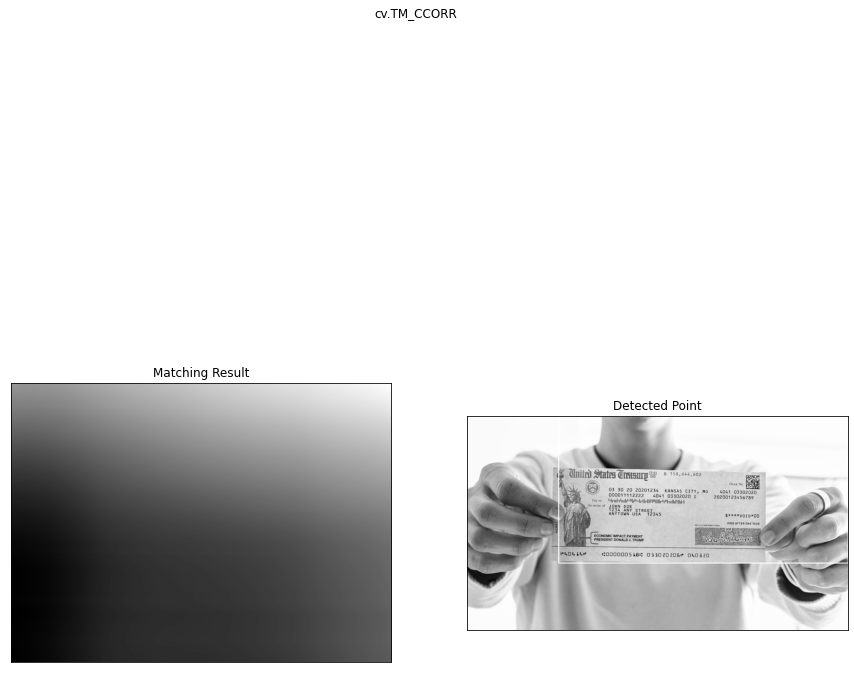

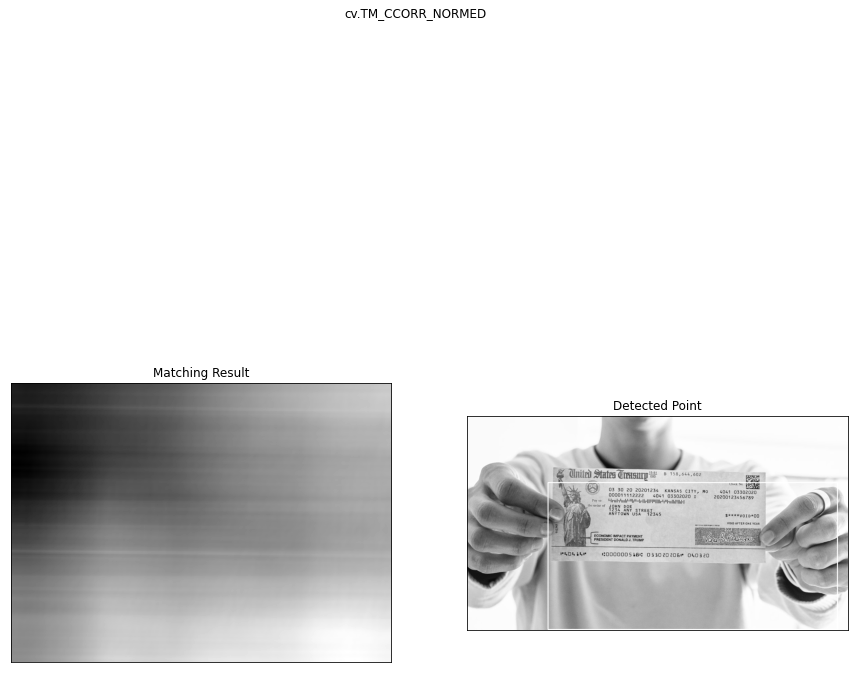

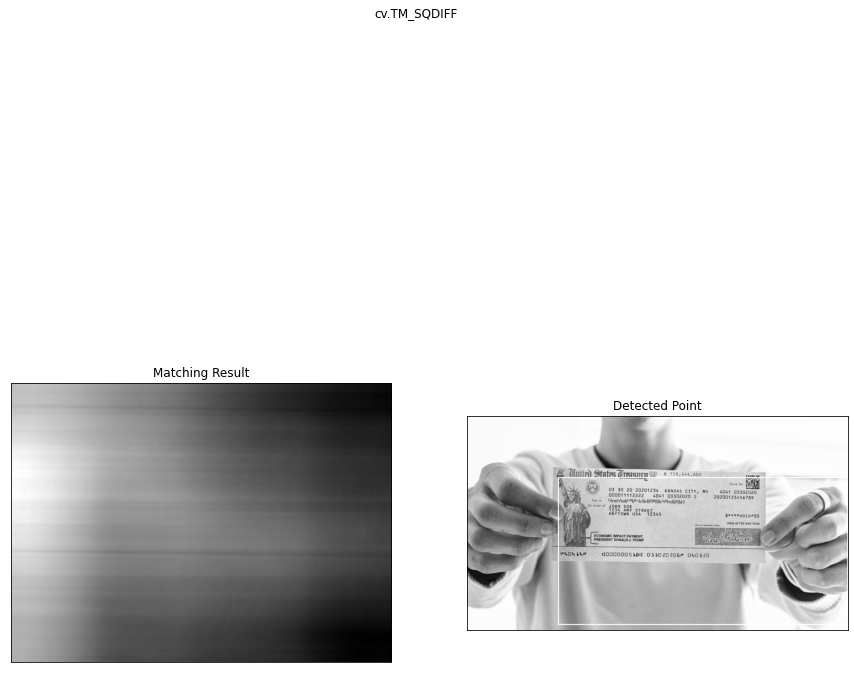

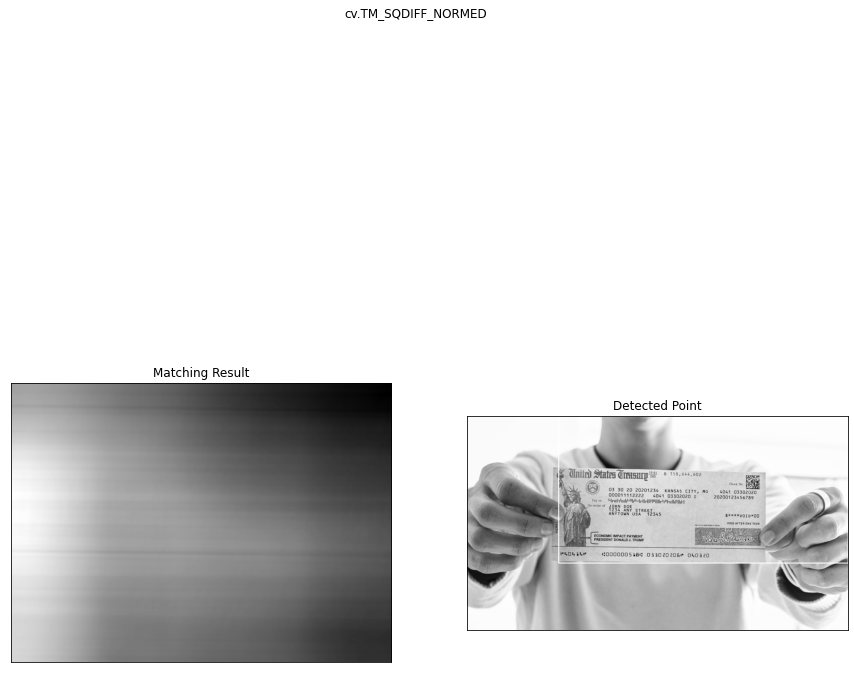

In [78]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('samples/check5.jpg',0)
img2 = img.copy()
template = cv.imread('samples/check.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

# Multi-scale tempelate matching

In [8]:
import glob
import imutils
import cv2
import cv2 as cv

template = cv.imread("samples/blankcheck2.jpg")
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]



samples/check1.jpg


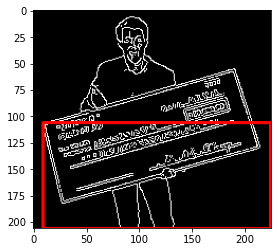

In [10]:
image = "samples/check1.jpg"
for imagePath in glob.glob(image):
    # load the image, convert it to grayscale, and initialize the
    # bookkeeping variable to keep track of the matched region
    print(imagePath)
    image = cv2.imread(imagePath)
    pltshow(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found = None
    # loop over the scales of the image
    for scale in np.linspace(0.2, 1.0, 20)[::-1]:
        # resize the image according to the scale, and keep track
        # of the ratio of the resizing
        resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])
        # if the resized image is smaller than the template, then break
        # from the loop
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break
        # detect edges in the resized, grayscale image and apply template
        # matching to find the template in the image
        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
        # check to see if the iteration should be visualized
        if True:
            # draw a bounding box around the detected region
            clone = np.dstack([edged, edged, edged])
            cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
                (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
            # cv2.imshow("Visualize", clone)
            # cv2.waitKey(0)
        # if we have found a new maximum correlation value, then update
        # the bookkeeping variable
        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)
    # unpack the bookkeeping variable and compute the (x, y) coordinates
    # of the bounding box based on the resized ratio
    (_, maxLoc, r) = found
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
    break
    # draw a bounding box around the detected result and display the image
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
pltshow(clone)

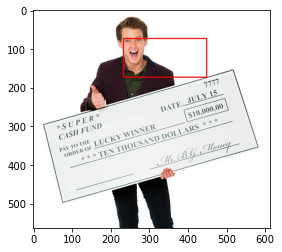

In [11]:
pltshow(image)

# FLANN

5
[[ 7.56529641e-01 -1.00058750e+01  8.69190708e+02]
 [ 3.65921149e-01 -3.83655196e+00  2.82197425e+02]
 [ 1.13371308e-03 -1.28318730e-02  1.00000000e+00]] [[1]
 [1]
 [0]
 [1]
 [1]]


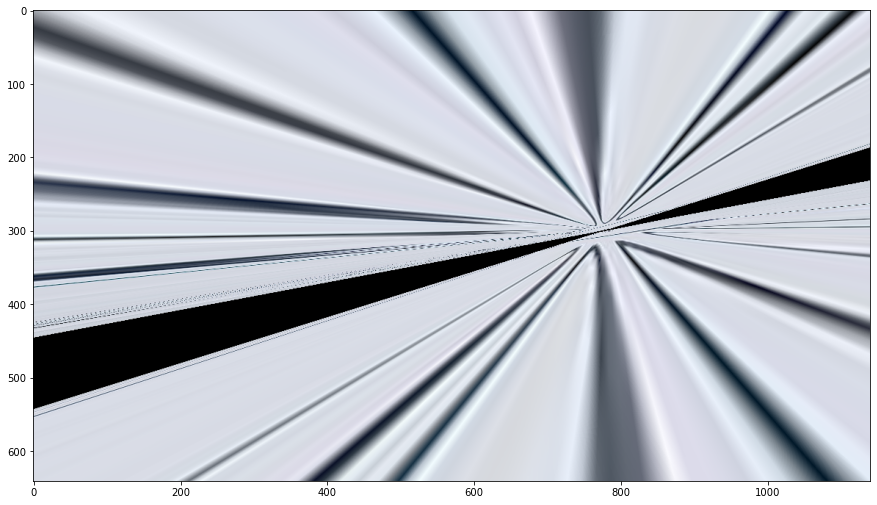

In [40]:
import argparse

import cv2
import numpy as np


def get_corrected_img(img1, img2):
    MIN_MATCHES = 50

    orb = cv2.ORB_create(nfeatures=1500)
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    index_params = dict(algorithm=6,
                        table_number=6,
                        key_size=12,
                        multi_probe_level=2)
    search_params = {}
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # As per Lowe's ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
    print(len(good_matches))
    if len(good_matches) > 0:
        src_points = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        m, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)
        corrected_img = cv2.warpPerspective(img1, m, (img2.shape[1], img2.shape[0]))
        # corrected_img = getMaskFromImg(img1, m)
        print(m, mask)
        return corrected_img
    return img2

im1 = cv2.imread("samples/check5.jpg")
im2 = cv2.imread("samples/check.png")
# pltshow(im2)

imgo = get_corrected_img(im2, im1)
pltshow(imgo)
# plt.imshow(img)

# Org

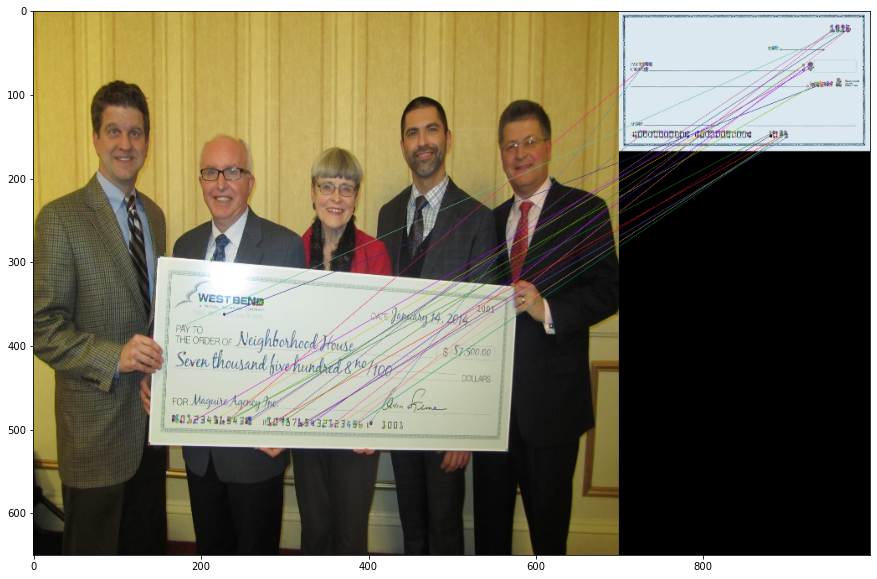

In [46]:
import numpy as np
import cv2
  
     
# Read the query image as query_img
# and train image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg 
query_img = cv2.imread('samples/check4.jpg')
train_img = cv2.imread('samples/blankcheck.jpg')
  
# Convert it to grayscale
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
  
# Initialize the ORB detector algorithm
orb = cv2.ORB_create()
  
# Now detect the keypoints and compute
# the descriptors for the query image
# and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)
 
# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)
  
# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(query_img, queryKeypoints,
train_img, trainKeypoints, matches[:20],None)
  
final_img = cv2.resize(final_img, (1000,650))
 
# Show the final image
# cv2.imshow("Matches", final_img)
pltshow(final_img)